In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv(r"C:\Users\asus\Documents\ML Lab\Dataset\glass_csv.csv")
dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build-wind-float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic-wind-float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build-wind-float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build-wind-non-float
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,vehic-wind-float
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,build-wind-non-float
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,build-wind-non-float
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,build-wind-non-float


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [5]:
dataset['Type'].unique()

array(['build-wind-float', 'vehic-wind-float', 'tableware',
       'build-wind-non-float', 'headlamps', 'containers'], dtype=object)

In [6]:
dataset.Type = dataset.Type.map({'build-wind-float': 1, 
                                 'vehic-wind-float': 2, 
                                 'tableware': 3, 
                                 'build-wind-non-float': 4, 
                                 'headlamps': 5, 
                                 'containers': 6})

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
dataset['Type'].value_counts()

4    76
1    70
5    29
2    17
6    13
3     9
Name: Type, dtype: int64

# Correlation

In [9]:
def pearson(x,y):
    correlation_matrix = np.corrcoef(x,y)
    return correlation_matrix[0,1]

In [10]:
print(pearson(dataset.RI, dataset.Type))
print(pearson(dataset.Na, dataset.Type))
print(pearson(dataset.Mg, dataset.Type))
print(pearson(dataset.Si, dataset.Type))
print(pearson(dataset.K, dataset.Type))
print(pearson(dataset.Ca, dataset.Type))
print(pearson(dataset.Ba, dataset.Type))
print(pearson(dataset.Fe, dataset.Type))

-0.0677591154793516
0.12806223870167835
-0.6006713344506115
0.04235634760385825
0.16356113092453395
0.10314967574678913
0.37391361607339
-0.018647416379839563


# Covariance

In [12]:
print(np.cov(dataset.RI, dataset.Type)[0,1])
print(np.cov(dataset.Na, dataset.Type)[0,1])
print(np.cov(dataset.Mg, dataset.Type)[0,1])
print(np.cov(dataset.Si, dataset.Type)[0,1])
print(np.cov(dataset.K, dataset.Type)[0,1])
print(np.cov(dataset.Ca, dataset.Type)[0,1])
print(np.cov(dataset.Ba, dataset.Type)[0,1])
print(np.cov(dataset.Fe, dataset.Type)[0,1])

-0.0003467452064411387
0.17621780527401143
-1.4599648984248164
0.05528190952568992
0.17975165635557885
0.2473643104734323
0.31328287481900735
-0.00306173489535343


In [13]:
dataset.drop(['RI', 'Fe'], axis=1, inplace=True)
dataset.head(5)

,Na,Mg,Al,Si,K,Ca,Ba,Type
0,12.79,3.50,1.12,73.03,0.64,8.77,0.0,1
1,12.16,3.52,1.35,72.89,0.57,8.53,0.0,2
2,13.21,3.48,1.41,72.64,0.59,8.43,0.0,1
3,14.40,1.74,1.54,74.55,0.00,7.59,0.0,3
4,12.30,0.00,1.00,70.16,0.12,16.19,0.0,4


# Train and Test

In [14]:
y = dataset.Type.copy()
x = dataset.drop(['Type'], axis=1)

In [15]:
x

,Na,Mg,Al,Si,K,Ca,Ba
0,12.79,3.50,1.12,73.03,0.64,8.77,0.0
1,12.16,3.52,1.35,72.89,0.57,8.53,0.0
2,13.21,3.48,1.41,72.64,0.59,8.43,0.0
3,14.40,1.74,1.54,74.55,0.00,7.59,0.0
4,12.30,0.00,1.00,70.16,0.12,16.19,0.0
...,...,...,...,...,...,...,...
209,13.42,3.40,1.22,72.69,0.59,8.32,0.0
210,12.86,3.52,2.12,72.66,0.69,7.97,0.0
211,13.92,3.52,1.25,72.88,0.37,7.94,0.0
212,12.67,2.88,1.71,73.21,0.73,8.54,0.0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 7), (54, 7), (160,), (54,))

# Logistic Regression Model

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred = pd.Series(model.predict(x_test))

In [20]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis = 1)
z.columns = ['True', 'Prediction']

acc_log = metrics.accuracy_score(y_test, y_pred)
pre_log = metrics.precision_score(y_test,y_pred, average='macro')
recall_log = metrics.recall_score(y_test,y_pred, average='macro')
f1_log = metrics.f1_score(y_test,y_pred, average='macro')

In [21]:
z.head(10)

,True,Prediction
0,1,1
1,4,4
2,2,4
3,1,1
4,3,4
5,2,1
6,5,5
7,1,1
8,6,4
9,4,4


In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.7037037037037037
Precision: 0.456219806763285
Recall: 0.48926767676767685
f1-score: 0.4668668668668668


Text(0.5, 15.0, 'Predicted')

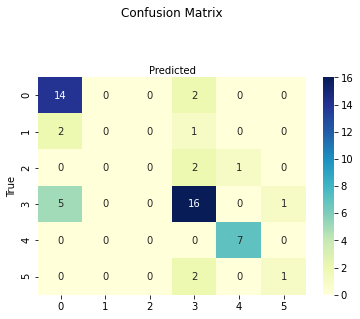

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y =1.25)
plt.ylabel("True")
plt.xlabel("Predicted")

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)
pre_knn = metrics.precision_score(y_test,y_pred, average='macro')
recall_knn = metrics.recall_score(y_test,y_pred, average='macro')
f1_knn = metrics.f1_score(y_test,y_pred, average='macro')

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.7962962962962963
Precision: 0.8602339181286549
Recall: 0.78255772005772
f1-score: 0.7782263971288361


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.88      0.76        16
           2       1.00      0.33      0.50         3
           3       0.60      1.00      0.75         3
           4       0.89      0.77      0.83        22
           5       1.00      0.71      0.83         7
           6       1.00      1.00      1.00         3

    accuracy                           0.80        54
   macro avg       0.86      0.78      0.78        54
weighted avg       0.84      0.80      0.80        54



# Classification SVM

In [28]:
from sklearn.svm import SVC, LinearSVC

In [29]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = metrics.accuracy_score(y_test, y_pred)
pre_linear_svc = metrics.precision_score(y_test,y_pred, average='macro')
recall_linear_svc = metrics.recall_score(y_test,y_pred, average='macro')
f1_linear_svc = metrics.f1_score(y_test,y_pred, average='macro')

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.5740740740740741
Precision: 0.45343915343915336
Recall: 0.5009469696969697
f1-score: 0.4037280701754386


# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)

acc_gaussian = metrics.accuracy_score(y_test, y_pred)
pre_gaussian = metrics.precision_score(y_test,y_pred, average='macro')
recall_gaussian = metrics.recall_score(y_test,y_pred, average='macro')
f1_gaussian = metrics.f1_score(y_test,y_pred, average='macro')

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.5
Precision: 0.48655913978494625
Recall: 0.530799062049062
f1-score: 0.48096537032707243


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred = decision_tree.predict(x_test)

acc_decision = metrics.accuracy_score(y_test, y_pred)
pre_decision = metrics.precision_score(y_test,y_pred, average='macro')
recall_decision = metrics.recall_score(y_test,y_pred, average='macro')
f1_decision = metrics.f1_score(y_test,y_pred, average='macro')

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.7037037037037037
Precision: 0.702170868347339
Recall: 0.6592712842712842
f1-score: 0.645021645021645


# Perceptron

In [37]:
from sklearn.linear_model import Perceptron

In [38]:
percptn =Perceptron()
percptn.fit(x_train,y_train)
y_pred=percptn.predict(x_test)

acc_perceptn=metrics.accuracy_score(y_test,y_pred)
pre_perceptn = metrics.precision_score(y_test,y_pred, average='macro')
recall_perceptn = metrics.recall_score(y_test,y_pred, average='macro')
f1_perceptn = metrics.f1_score(y_test,y_pred, average='macro')

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.42592592592592593
Precision: 0.24
Recall: 0.19047619047619047
f1-score: 0.14351851851851852


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
randomForest = RandomForestClassifier()
randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)

acc_randomForest = metrics.accuracy_score(y_test, y_pred)
pre_randomForest = metrics.precision_score(y_test,y_pred, average='macro')
recall_randomForest = metrics.recall_score(y_test,y_pred, average='macro')
f1_randomForest = metrics.f1_score(y_test,y_pred, average='macro')

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.7777777777777778
Precision: 0.8349282296650719
Recall: 0.6952561327561327
f1-score: 0.7278721278721277


# Stochastic Gradient Descent

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
SGD = SGDClassifier()
SGD.fit(x_train, y_train)
y_pred = SGD.predict(x_test)

acc_SGD = metrics.accuracy_score(y_test, y_pred)
pre_SGD = metrics.precision_score(y_test,y_pred, average='macro')
recall_SGD = metrics.recall_score(y_test,y_pred, average='macro')
f1_SGD = metrics.f1_score(y_test,y_pred, average='macro')

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1-score:", metrics.f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.2222222222222222
Precision: 0.1369047619047619
Recall: 0.2604166666666667
f1-score: 0.12936507936507938


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.56      0.64        16
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         7
           6       0.07      1.00      0.13         3

    accuracy                           0.22        54
   macro avg       0.14      0.26      0.13        54
weighted avg       0.23      0.22      0.20        54



In [47]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree', 'Perceptron', 'Random Forest', 'Stochastic Gradient Descent'],
    'Accuracy': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_perceptn, acc_randomForest, acc_SGD],
    'Precission': [pre_linear_svc, pre_knn, pre_log, 
             pre_gaussian, pre_decision, pre_perceptn, pre_randomForest, pre_SGD],
    'Recall': [recall_linear_svc, recall_knn, recall_log, 
             recall_gaussian, recall_decision, recall_perceptn, recall_randomForest, recall_SGD],
    'F1-Score': [f1_linear_svc, f1_knn, f1_log, 
             f1_gaussian, f1_decision, f1_perceptn, f1_randomForest, f1_SGD]})

result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df

,Model,Precission,Recall,F1-Score
Accuracy,,,,
0.796296,KNN,0.860234,0.782558,0.778226
0.777778,Random Forest,0.834928,0.695256,0.727872
0.703704,Logistic Regression,0.456220,0.489268,0.466867
0.703704,Decision Tree,0.702171,0.659271,0.645022
0.574074,Support Vector Machines,0.453439,0.500947,0.403728
0.500000,Naive Bayes,0.486559,0.530799,0.480965
0.425926,Perceptron,0.240000,0.190476,0.143519
0.222222,Stochastic Gradient Descent,0.136905,0.260417,0.129365


# Bar Chart

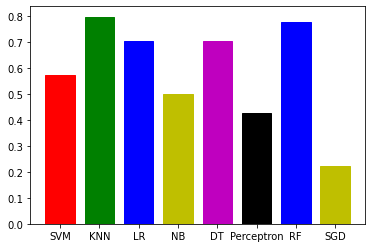

In [48]:
barlist=plt.bar( 
    ["SVM", "KNN", "LR","NB", "DT", 'Perceptron', "RF", "SGD"],
    [acc_linear_svc, acc_knn, acc_log, acc_gaussian, acc_decision, acc_perceptn, acc_randomForest, acc_SGD],
    width = .75
)

barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('m')
barlist[5].set_color('k')
barlist[6].set_color('b')
barlist[7].set_color('y')

plt.show()